## Deliverable 3: Optimizing Neural Network

In [1]:
import os
os.getcwd()

'/Users/wimal/Documents/DataScience/UNC/Neural_Network_Charity_Analysis'

In [2]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

### Preprocessing

In [3]:
# Import our dependencies
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
import pandas as pd
import tensorflow as tf

#  Import and read the charity_data.csv.
import pandas as pd 
application_df = pd.read_csv("Resources/charity_data.csv")
application_df.head()

,EIN,NAME,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,10520599,BLUE KNIGHTS MOTORCYCLE CLUB,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,10531628,AMERICAN CHESAPEAKE CLUB CHARITABLE TR,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,10547893,ST CLOUD PROFESSIONAL FIREFIGHTERS,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,10553066,SOUTHSIDE ATHLETIC ASSOCIATION,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,10556103,GENETIC RESEARCH INSTITUTE OF THE DESERT,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1


In [4]:
# Drop the non-beneficial ID columns, 'EIN' and 'NAME'.
#  YOUR CODE GOES HERE

application_df = application_df.drop(columns = ["EIN", "NAME"], axis=1)
application_df

,APPLICATION_TYPE,AFFILIATION,CLASSIFICATION,USE_CASE,ORGANIZATION,STATUS,INCOME_AMT,SPECIAL_CONSIDERATIONS,ASK_AMT,IS_SUCCESSFUL
0,T10,Independent,C1000,ProductDev,Association,1,0,N,5000,1
1,T3,Independent,C2000,Preservation,Co-operative,1,1-9999,N,108590,1
2,T5,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
3,T3,CompanySponsored,C2000,Preservation,Trust,1,10000-24999,N,6692,1
4,T3,Independent,C1000,Heathcare,Trust,1,100000-499999,N,142590,1
...,...,...,...,...,...,...,...,...,...,...
34294,T4,Independent,C1000,ProductDev,Association,1,0,N,5000,0
34295,T4,CompanySponsored,C3000,ProductDev,Association,1,0,N,5000,0
34296,T3,CompanySponsored,C2000,Preservation,Association,1,0,N,5000,0
34297,T5,Independent,C3000,ProductDev,Association,1,0,N,5000,1


In [5]:
# Determine the number of unique values in each column.
#  YOUR CODE GOES HERE
application_df.apply(lambda x: x.nunique())

APPLICATION_TYPE            17
AFFILIATION                  6
CLASSIFICATION              71
USE_CASE                     5
ORGANIZATION                 4
STATUS                       2
INCOME_AMT                   9
SPECIAL_CONSIDERATIONS       2
ASK_AMT                   8747
IS_SUCCESSFUL                2
dtype: int64

In [6]:
# Look at APPLICATION_TYPE value counts for binning
#  YOUR CODE GOES HERE
app_type_counts = application_df.APPLICATION_TYPE.value_counts()
app_type_counts

T3     27037
T4      1542
T6      1216
T5      1173
T19     1065
T8       737
T7       725
T10      528
T9       156
T13       66
T12       27
T2        16
T25        3
T14        3
T29        2
T15        2
T17        1
Name: APPLICATION_TYPE, dtype: int64

<AxesSubplot:ylabel='Density'>

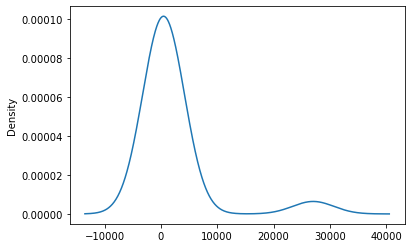

In [7]:
# Visualize the value counts of APPLICATION_TYPE
#  YOUR CODE GOES HERE
app_type_counts.plot.density()

In [8]:
# Determine which values to replace if counts are less than ...?
#  YOUR CODE GOES HERE
replace_application = list(app_type_counts[app_type_counts < 500].index)
# Replace in dataframe
for app in replace_application:
    application_df.APPLICATION_TYPE = application_df.APPLICATION_TYPE.replace(app,"Other")
    
# Check to make sure binning was successful
application_df.APPLICATION_TYPE.value_counts()

T3       27037
T4        1542
T6        1216
T5        1173
T19       1065
T8         737
T7         725
T10        528
Other      276
Name: APPLICATION_TYPE, dtype: int64

In [9]:
# Look at CLASSIFICATION value counts for binning
#  YOUR CODE GOES HERE
classification_counts = application_df.CLASSIFICATION.value_counts()
classification_counts

C1000    17326
C2000     6074
C1200     4837
C3000     1918
C2100     1883
         ...  
C4120        1
C8210        1
C2561        1
C4500        1
C2150        1
Name: CLASSIFICATION, Length: 71, dtype: int64

<AxesSubplot:ylabel='Density'>

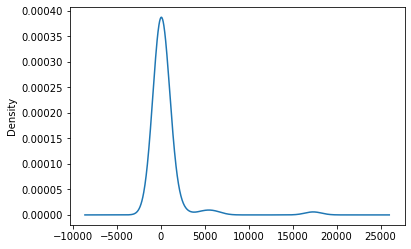

In [10]:
# Visualize the value counts of CLASSIFICATION
#  YOUR CODE GOES HERE
classification_counts.plot.density()

In [11]:
# Determine which values to replace if counts are less than ..?
#  YOUR CODE GOES HERE
replace_class = list(classification_counts[classification_counts < 1800].index)
# Replace in dataframe
for cls in replace_class:
    application_df.CLASSIFICATION = application_df.CLASSIFICATION.replace(cls,"Other")
    
# Check to make sure binning was successful
application_df.CLASSIFICATION.value_counts()

C1000    17326
C2000     6074
C1200     4837
Other     2261
C3000     1918
C2100     1883
Name: CLASSIFICATION, dtype: int64

In [12]:
# Generate our categorical variable lists
#  YOUR CODE GOES HERE
application_cat = application_df.dtypes[application_df.dtypes == "object"].index.tolist()
application_cat

['APPLICATION_TYPE',
 'AFFILIATION',
 'CLASSIFICATION',
 'USE_CASE',
 'ORGANIZATION',
 'INCOME_AMT',
 'SPECIAL_CONSIDERATIONS']

In [13]:
# Create a OneHotEncoder instance
enc = OneHotEncoder(sparse=False)

# Fit and transform the OneHotEncoder using the categorical variable list
#  YOUR CODE GOES HERE
encode_df = pd.DataFrame(enc.fit_transform(application_df[application_cat]))
# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(application_cat)
encode_df.head()

/Users/wimal/opt/miniforge3/envs/mlp/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,APPLICATION_TYPE_T7,APPLICATION_TYPE_T8,AFFILIATION_CompanySponsored,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [14]:
# Merge one-hot encoded features and drop the originals
#  YOUR CODE GOES HERE
application_df = application_df.merge(encode_df,left_index=True, right_index=True)
application_df = application_df.drop(application_cat,1)
application_df.head()

<ipython-input-14-2bd7192f3dec>:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  application_df = application_df.drop(application_cat,1)


,STATUS,ASK_AMT,IS_SUCCESSFUL,APPLICATION_TYPE_Other,APPLICATION_TYPE_T10,APPLICATION_TYPE_T19,APPLICATION_TYPE_T3,APPLICATION_TYPE_T4,APPLICATION_TYPE_T5,APPLICATION_TYPE_T6,...,INCOME_AMT_1-9999,INCOME_AMT_10000-24999,INCOME_AMT_100000-499999,INCOME_AMT_10M-50M,INCOME_AMT_1M-5M,INCOME_AMT_25000-99999,INCOME_AMT_50M+,INCOME_AMT_5M-10M,SPECIAL_CONSIDERATIONS_N,SPECIAL_CONSIDERATIONS_Y
0,1,5000,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1,108590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1,5000,0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1,6692,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1,142590,1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [15]:
# Split our preprocessed data into our features and target arrays
#  YOUR CODE GOES HERE
y = application_df.IS_SUCCESSFUL.values
X = application_df.drop(columns=["IS_SUCCESSFUL"]).values
# Split the preprocessed data into a training and testing dataset
#  YOUR CODE GOES HERE

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)


In [16]:
# Create a StandardScaler instances
scaler = StandardScaler()

# Fit the StandardScaler
X_scaler = scaler.fit(X_train)

# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [17]:
X_train_scaled.shape

(25724, 43)

## Checkpoints

In [33]:
# Import checkpoint dependencies
import os
from tensorflow.keras.callbacks import ModelCheckpoint

# Define the checkpoint path and filenames
os.makedirs("checkpoints/",exist_ok=True)
checkpoint_path = "checkpoints/weights.{epoch:02d}.hdf5"

### Compile, Train and Evaluate the Model

## Try 01

- hidden_nodes_layer1 = 30, activation = 'relu'
- hidden_nodes_layer2 = 12, activation = 'relu' (Added additional hidden layer)
- hidden_nodes_layer3 = 8, activation = 'sigmoid'

In [37]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints01/",exist_ok=True)
checkpoint_path = "checkpoints01/weights.{epoch:02d}.hdf5"

In [38]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 30
hidden_nodes_layer2 = 12
hidden_nodes_layer3 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Third hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model

nn.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_13 (Dense)            (None, 30)                1320      
                                                                 
 dense_14 (Dense)            (None, 12)                372       
                                                                 
 dense_15 (Dense)            (None, 8)                 104       
                                                                 
 dense_16 (Dense)            (None, 1)                 9         
                                                                 
Total params: 1,805
Trainable params: 1,805
Non-trainable params: 0
_________________________________________________________________


In [39]:
# Compile the model
#  YOUR CODE GOES HERE

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

In [40]:
# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=20)

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
 11/804 [..............................] - ETA: 8s - loss: 0.8407 - accuracy: 0.4801 
Epoch 1: saving model to checkpoints01/weights.01.hdf5
 38/804 [>.............................] - ETA: 5s - loss: 0.7296 - accuracy: 0.5625
Epoch 1: saving model to checkpoints01/weights.01.hdf5
 54/804 [=>............................] - ETA: 5s - loss: 0.7011 - accuracy: 0.5897
Epoch 1: saving model to checkpoints01/weights.01.hdf5
 78/804 [=>............................] - ETA: 5s - loss: 0.6723 - accuracy: 0.6174
Epoch 1: saving model to checkpoints01/weights.01.hdf5
 95/804 [==>...........................] - ETA: 4s - loss: 0.6630 - accuracy: 0.6306
Epoch 1: saving model to checkpoints01/weights.01.hdf5
112/804 [===>..........................] - ETA: 4s - loss: 0.6562 - accuracy: 0.6378
Epoch 1: saving model to checkpoints01/weights.01.hdf5
138/804 [====>.........................] - ETA: 4s - loss: 0.6475 - accuracy: 0.6486
Epoch 1: saving model to checkpoints01/weights.01.hdf5
154/804

373/804 [============>.................] - ETA: 2s - loss: 0.5530 - accuracy: 0.7306
Epoch 2: saving model to checkpoints01/weights.02.hdf5
389/804 [=============>................] - ETA: 2s - loss: 0.5525 - accuracy: 0.7312
Epoch 2: saving model to checkpoints01/weights.02.hdf5
415/804 [==============>...............] - ETA: 2s - loss: 0.5539 - accuracy: 0.7300
Epoch 2: saving model to checkpoints01/weights.02.hdf5
432/804 [===============>..............] - ETA: 2s - loss: 0.5533 - accuracy: 0.7309
Epoch 2: saving model to checkpoints01/weights.02.hdf5
449/804 [===============>..............] - ETA: 2s - loss: 0.5536 - accuracy: 0.7307
Epoch 2: saving model to checkpoints01/weights.02.hdf5
466/804 [================>.............] - ETA: 2s - loss: 0.5538 - accuracy: 0.7304
Epoch 2: saving model to checkpoints01/weights.02.hdf5
486/804 [=================>............] - ETA: 2s - loss: 0.5546 - accuracy: 0.7294
Epoch 2: saving model to checkpoints01/weights.02.hdf5
514/804 [===========

730/804 [==========================>...] - ETA: 0s - loss: 0.5528 - accuracy: 0.7306
Epoch 3: saving model to checkpoints01/weights.03.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5532 - accuracy: 0.7302
Epoch 3: saving model to checkpoints01/weights.03.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5526 - accuracy: 0.7306
Epoch 3: saving model to checkpoints01/weights.03.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5522 - accuracy: 0.7308
Epoch 3: saving model to checkpoints01/weights.03.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5522 - accuracy: 0.7309
Epoch 4/100
  1/804 [..............................] - ETA: 4s - loss: 0.5344 - accuracy: 0.7188
Epoch 4: saving model to checkpoints01/weights.04.hdf5
 18/804 [..............................] - ETA: 4s - loss: 0.5396 - accuracy: 0.7396
Epoch 4: saving model to checkpoints01/weights.04.hdf5
 45/804 [>.............................] - ETA: 4s - loss: 

258/804 [========>.....................] - ETA: 3s - loss: 0.5536 - accuracy: 0.7281
Epoch 5: saving model to checkpoints01/weights.05.hdf5
275/804 [=========>....................] - ETA: 3s - loss: 0.5520 - accuracy: 0.7301
Epoch 5: saving model to checkpoints01/weights.05.hdf5
303/804 [==========>...................] - ETA: 3s - loss: 0.5516 - accuracy: 0.7299
Epoch 5: saving model to checkpoints01/weights.05.hdf5
320/804 [==========>...................] - ETA: 3s - loss: 0.5504 - accuracy: 0.7307
Epoch 5: saving model to checkpoints01/weights.05.hdf5
337/804 [===========>..................] - ETA: 3s - loss: 0.5503 - accuracy: 0.7310
Epoch 5: saving model to checkpoints01/weights.05.hdf5
363/804 [============>.................] - ETA: 2s - loss: 0.5473 - accuracy: 0.7345
Epoch 5: saving model to checkpoints01/weights.05.hdf5
380/804 [=============>................] - ETA: 2s - loss: 0.5468 - accuracy: 0.7356
Epoch 5: saving model to checkpoints01/weights.05.hdf5
397/804 [===========

613/804 [=====================>........] - ETA: 1s - loss: 0.5477 - accuracy: 0.7328
Epoch 6: saving model to checkpoints01/weights.06.hdf5
636/804 [======================>.......] - ETA: 1s - loss: 0.5469 - accuracy: 0.7335
Epoch 6: saving model to checkpoints01/weights.06.hdf5
659/804 [=======================>......] - ETA: 0s - loss: 0.5468 - accuracy: 0.7337
Epoch 6: saving model to checkpoints01/weights.06.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5473 - accuracy: 0.7334
Epoch 6: saving model to checkpoints01/weights.06.hdf5
696/804 [========================>.....] - ETA: 0s - loss: 0.5470 - accuracy: 0.7337
Epoch 6: saving model to checkpoints01/weights.06.hdf5
719/804 [=========================>....] - ETA: 0s - loss: 0.5474 - accuracy: 0.7334
Epoch 6: saving model to checkpoints01/weights.06.hdf5
733/804 [==========================>...] - ETA: 0s - loss: 0.5479 - accuracy: 0.7332
Epoch 6: saving model to checkpoints01/weights.06.hdf5
756/804 [===========

148/804 [====>.........................] - ETA: 4s - loss: 0.5438 - accuracy: 0.7316
Epoch 8: saving model to checkpoints01/weights.08.hdf5
171/804 [=====>........................] - ETA: 4s - loss: 0.5459 - accuracy: 0.7314
Epoch 8: saving model to checkpoints01/weights.08.hdf5
187/804 [=====>........................] - ETA: 4s - loss: 0.5460 - accuracy: 0.7323
Epoch 8: saving model to checkpoints01/weights.08.hdf5
210/804 [======>.......................] - ETA: 4s - loss: 0.5492 - accuracy: 0.7298
Epoch 8: saving model to checkpoints01/weights.08.hdf5
225/804 [=======>......................] - ETA: 3s - loss: 0.5503 - accuracy: 0.7289
Epoch 8: saving model to checkpoints01/weights.08.hdf5
248/804 [========>.....................] - ETA: 3s - loss: 0.5522 - accuracy: 0.7272
Epoch 8: saving model to checkpoints01/weights.08.hdf5
264/804 [========>.....................] - ETA: 3s - loss: 0.5521 - accuracy: 0.7279
Epoch 8: saving model to checkpoints01/weights.08.hdf5
289/804 [=========>.

500/804 [=================>............] - ETA: 2s - loss: 0.5484 - accuracy: 0.7333
Epoch 9: saving model to checkpoints01/weights.09.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.5485 - accuracy: 0.7326
Epoch 9: saving model to checkpoints01/weights.09.hdf5
540/804 [===================>..........] - ETA: 1s - loss: 0.5489 - accuracy: 0.7323
Epoch 9: saving model to checkpoints01/weights.09.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.5469 - accuracy: 0.7340
Epoch 9: saving model to checkpoints01/weights.09.hdf5
582/804 [====================>.........] - ETA: 1s - loss: 0.5468 - accuracy: 0.7345
Epoch 9: saving model to checkpoints01/weights.09.hdf5
599/804 [=====================>........] - ETA: 1s - loss: 0.5469 - accuracy: 0.7347
Epoch 9: saving model to checkpoints01/weights.09.hdf5
625/804 [======================>.......] - ETA: 1s - loss: 0.5486 - accuracy: 0.7337
Epoch 9: saving model to checkpoints01/weights.09.hdf5
640/804 [===========

 32/804 [>.............................] - ETA: 5s - loss: 0.5495 - accuracy: 0.7363
Epoch 11: saving model to checkpoints01/weights.11.hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.5470 - accuracy: 0.7360
Epoch 11: saving model to checkpoints01/weights.11.hdf5
 74/804 [=>............................] - ETA: 4s - loss: 0.5448 - accuracy: 0.7361
Epoch 11: saving model to checkpoints01/weights.11.hdf5
 99/804 [==>...........................] - ETA: 4s - loss: 0.5467 - accuracy: 0.7330
Epoch 11: saving model to checkpoints01/weights.11.hdf5
114/804 [===>..........................] - ETA: 4s - loss: 0.5487 - accuracy: 0.7305
Epoch 11: saving model to checkpoints01/weights.11.hdf5
137/804 [====>.........................] - ETA: 4s - loss: 0.5512 - accuracy: 0.7283
Epoch 11: saving model to checkpoints01/weights.11.hdf5
153/804 [====>.........................] - ETA: 4s - loss: 0.5500 - accuracy: 0.7310
Epoch 11: saving model to checkpoints01/weights.11.hdf5
177/804 [====

370/804 [============>.................] - ETA: 2s - loss: 0.5432 - accuracy: 0.7364
Epoch 12: saving model to checkpoints01/weights.12.hdf5
395/804 [=============>................] - ETA: 2s - loss: 0.5411 - accuracy: 0.7378
Epoch 12: saving model to checkpoints01/weights.12.hdf5
412/804 [==============>...............] - ETA: 2s - loss: 0.5417 - accuracy: 0.7367
Epoch 12: saving model to checkpoints01/weights.12.hdf5
429/804 [===============>..............] - ETA: 2s - loss: 0.5413 - accuracy: 0.7368
Epoch 12: saving model to checkpoints01/weights.12.hdf5
455/804 [===============>..............] - ETA: 2s - loss: 0.5414 - accuracy: 0.7368
Epoch 12: saving model to checkpoints01/weights.12.hdf5
472/804 [================>.............] - ETA: 2s - loss: 0.5420 - accuracy: 0.7369
Epoch 12: saving model to checkpoints01/weights.12.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.5408 - accuracy: 0.7380
Epoch 12: saving model to checkpoints01/weights.12.hdf5
506/804 [====

704/804 [=========================>....] - ETA: 0s - loss: 0.5458 - accuracy: 0.7351
Epoch 13: saving model to checkpoints01/weights.13.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.5458 - accuracy: 0.7353
Epoch 13: saving model to checkpoints01/weights.13.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5461 - accuracy: 0.7352
Epoch 13: saving model to checkpoints01/weights.13.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5450 - accuracy: 0.7358
Epoch 13: saving model to checkpoints01/weights.13.hdf5
790/804 [============================>.] - ETA: 0s - loss: 0.5446 - accuracy: 0.7359
Epoch 13: saving model to checkpoints01/weights.13.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5450 - accuracy: 0.7359
Epoch 14/100
  1/804 [..............................] - ETA: 4s - loss: 0.5040 - accuracy: 0.7500
Epoch 14: saving model to checkpoints01/weights.14.hdf5
 27/804 [>.............................] - ETA: 4s -

238/804 [=======>......................] - ETA: 3s - loss: 0.5481 - accuracy: 0.7354
Epoch 15: saving model to checkpoints01/weights.15.hdf5
255/804 [========>.....................] - ETA: 3s - loss: 0.5481 - accuracy: 0.7353
Epoch 15: saving model to checkpoints01/weights.15.hdf5
282/804 [=========>....................] - ETA: 3s - loss: 0.5455 - accuracy: 0.7370
Epoch 15: saving model to checkpoints01/weights.15.hdf5
299/804 [==========>...................] - ETA: 3s - loss: 0.5464 - accuracy: 0.7370
Epoch 15: saving model to checkpoints01/weights.15.hdf5
316/804 [==========>...................] - ETA: 3s - loss: 0.5449 - accuracy: 0.7383
Epoch 15: saving model to checkpoints01/weights.15.hdf5
342/804 [===========>..................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7390
Epoch 15: saving model to checkpoints01/weights.15.hdf5
359/804 [============>.................] - ETA: 2s - loss: 0.5429 - accuracy: 0.7383
Epoch 15: saving model to checkpoints01/weights.15.hdf5
376/804 [====

571/804 [====================>.........] - ETA: 1s - loss: 0.5465 - accuracy: 0.7341
Epoch 16: saving model to checkpoints01/weights.16.hdf5
598/804 [=====================>........] - ETA: 1s - loss: 0.5471 - accuracy: 0.7334
Epoch 16: saving model to checkpoints01/weights.16.hdf5
615/804 [=====================>........] - ETA: 1s - loss: 0.5474 - accuracy: 0.7335
Epoch 16: saving model to checkpoints01/weights.16.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.5480 - accuracy: 0.7331
Epoch 16: saving model to checkpoints01/weights.16.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5468 - accuracy: 0.7339
Epoch 16: saving model to checkpoints01/weights.16.hdf5
675/804 [========================>.....] - ETA: 0s - loss: 0.5464 - accuracy: 0.7345
Epoch 16: saving model to checkpoints01/weights.16.hdf5
692/804 [========================>.....] - ETA: 0s - loss: 0.5465 - accuracy: 0.7346
Epoch 16: saving model to checkpoints01/weights.16.hdf5
719/804 [====

107/804 [==>...........................] - ETA: 4s - loss: 0.5408 - accuracy: 0.7398
Epoch 18: saving model to checkpoints01/weights.18.hdf5
124/804 [===>..........................] - ETA: 4s - loss: 0.5394 - accuracy: 0.7409
Epoch 18: saving model to checkpoints01/weights.18.hdf5
151/804 [====>.........................] - ETA: 4s - loss: 0.5398 - accuracy: 0.7413
Epoch 18: saving model to checkpoints01/weights.18.hdf5
168/804 [=====>........................] - ETA: 4s - loss: 0.5393 - accuracy: 0.7405
Epoch 18: saving model to checkpoints01/weights.18.hdf5
184/804 [=====>........................] - ETA: 3s - loss: 0.5391 - accuracy: 0.7395
Epoch 18: saving model to checkpoints01/weights.18.hdf5
211/804 [======>.......................] - ETA: 3s - loss: 0.5415 - accuracy: 0.7361
Epoch 18: saving model to checkpoints01/weights.18.hdf5
228/804 [=======>......................] - ETA: 3s - loss: 0.5431 - accuracy: 0.7336
Epoch 18: saving model to checkpoints01/weights.18.hdf5
244/804 [====

446/804 [===============>..............] - ETA: 2s - loss: 0.5421 - accuracy: 0.7377
Epoch 19: saving model to checkpoints01/weights.19.hdf5
463/804 [================>.............] - ETA: 2s - loss: 0.5423 - accuracy: 0.7374
Epoch 19: saving model to checkpoints01/weights.19.hdf5
480/804 [================>.............] - ETA: 2s - loss: 0.5436 - accuracy: 0.7366
Epoch 19: saving model to checkpoints01/weights.19.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.5435 - accuracy: 0.7368
Epoch 19: saving model to checkpoints01/weights.19.hdf5
526/804 [==================>...........] - ETA: 1s - loss: 0.5430 - accuracy: 0.7368
Epoch 19: saving model to checkpoints01/weights.19.hdf5
542/804 [===================>..........] - ETA: 1s - loss: 0.5425 - accuracy: 0.7371
Epoch 19: saving model to checkpoints01/weights.19.hdf5
559/804 [===================>..........] - ETA: 1s - loss: 0.5435 - accuracy: 0.7361
Epoch 19: saving model to checkpoints01/weights.19.hdf5
585/804 [====

777/804 [===========================>..] - ETA: 0s - loss: 0.5435 - accuracy: 0.7363
Epoch 20: saving model to checkpoints01/weights.20.hdf5
803/804 [============================>.] - ETA: 0s - loss: 0.5429 - accuracy: 0.7367
Epoch 20: saving model to checkpoints01/weights.20.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5430 - accuracy: 0.7366
Epoch 21/100
 19/804 [..............................] - ETA: 4s - loss: 0.5677 - accuracy: 0.7023
Epoch 21: saving model to checkpoints01/weights.21.hdf5
 36/804 [>.............................] - ETA: 4s - loss: 0.5609 - accuracy: 0.7188
Epoch 21: saving model to checkpoints01/weights.21.hdf5
 53/804 [>.............................] - ETA: 4s - loss: 0.5538 - accuracy: 0.7288
Epoch 21: saving model to checkpoints01/weights.21.hdf5
 79/804 [=>............................] - ETA: 4s - loss: 0.5560 - accuracy: 0.7298
Epoch 21: saving model to checkpoints01/weights.21.hdf5
 97/804 [==>...........................] - ETA: 4s -

315/804 [==========>...................] - ETA: 3s - loss: 0.5438 - accuracy: 0.7343
Epoch 22: saving model to checkpoints01/weights.22.hdf5
332/804 [===========>..................] - ETA: 2s - loss: 0.5451 - accuracy: 0.7339
Epoch 22: saving model to checkpoints01/weights.22.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.5453 - accuracy: 0.7336
Epoch 22: saving model to checkpoints01/weights.22.hdf5
366/804 [============>.................] - ETA: 2s - loss: 0.5448 - accuracy: 0.7345
Epoch 22: saving model to checkpoints01/weights.22.hdf5
394/804 [=============>................] - ETA: 2s - loss: 0.5447 - accuracy: 0.7345
Epoch 22: saving model to checkpoints01/weights.22.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.5448 - accuracy: 0.7343
Epoch 22: saving model to checkpoints01/weights.22.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.5453 - accuracy: 0.7335
Epoch 22: saving model to checkpoints01/weights.22.hdf5
454/804 [====

651/804 [=======================>......] - ETA: 1s - loss: 0.5437 - accuracy: 0.7343
Epoch 23: saving model to checkpoints01/weights.23.hdf5
665/804 [=======================>......] - ETA: 0s - loss: 0.5430 - accuracy: 0.7347
Epoch 23: saving model to checkpoints01/weights.23.hdf5
688/804 [========================>.....] - ETA: 0s - loss: 0.5425 - accuracy: 0.7354
Epoch 23: saving model to checkpoints01/weights.23.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.5427 - accuracy: 0.7353
Epoch 23: saving model to checkpoints01/weights.23.hdf5
725/804 [==========================>...] - ETA: 0s - loss: 0.5424 - accuracy: 0.7351
Epoch 23: saving model to checkpoints01/weights.23.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5427 - accuracy: 0.7353
Epoch 23: saving model to checkpoints01/weights.23.hdf5
771/804 [===========================>..] - ETA: 0s - loss: 0.5428 - accuracy: 0.7357
Epoch 23: saving model to checkpoints01/weights.23.hdf5
785/804 [====

183/804 [=====>........................] - ETA: 4s - loss: 0.5499 - accuracy: 0.7355
Epoch 25: saving model to checkpoints01/weights.25.hdf5
197/804 [======>.......................] - ETA: 4s - loss: 0.5503 - accuracy: 0.7343
Epoch 25: saving model to checkpoints01/weights.25.hdf5
220/804 [=======>......................] - ETA: 4s - loss: 0.5492 - accuracy: 0.7357
Epoch 25: saving model to checkpoints01/weights.25.hdf5
236/804 [=======>......................] - ETA: 3s - loss: 0.5499 - accuracy: 0.7345
Epoch 25: saving model to checkpoints01/weights.25.hdf5
260/804 [========>.....................] - ETA: 3s - loss: 0.5500 - accuracy: 0.7341
Epoch 25: saving model to checkpoints01/weights.25.hdf5
282/804 [=========>....................] - ETA: 3s - loss: 0.5504 - accuracy: 0.7326
Epoch 25: saving model to checkpoints01/weights.25.hdf5
300/804 [==========>...................] - ETA: 3s - loss: 0.5505 - accuracy: 0.7318
Epoch 25: saving model to checkpoints01/weights.25.hdf5
316/804 [====

519/804 [==================>...........] - ETA: 2s - loss: 0.5441 - accuracy: 0.7363
Epoch 26: saving model to checkpoints01/weights.26.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.5430 - accuracy: 0.7370
Epoch 26: saving model to checkpoints01/weights.26.hdf5
551/804 [===================>..........] - ETA: 1s - loss: 0.5433 - accuracy: 0.7364
Epoch 26: saving model to checkpoints01/weights.26.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.5441 - accuracy: 0.7357
Epoch 26: saving model to checkpoints01/weights.26.hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.5441 - accuracy: 0.7358
Epoch 26: saving model to checkpoints01/weights.26.hdf5
612/804 [=====================>........] - ETA: 1s - loss: 0.5432 - accuracy: 0.7366
Epoch 26: saving model to checkpoints01/weights.26.hdf5
638/804 [======================>.......] - ETA: 1s - loss: 0.5425 - accuracy: 0.7372
Epoch 26: saving model to checkpoints01/weights.26.hdf5
655/804 [====

 42/804 [>.............................] - ETA: 4s - loss: 0.5431 - accuracy: 0.7351
Epoch 28: saving model to checkpoints01/weights.28.hdf5
 70/804 [=>............................] - ETA: 4s - loss: 0.5366 - accuracy: 0.7379
Epoch 28: saving model to checkpoints01/weights.28.hdf5
 88/804 [==>...........................] - ETA: 4s - loss: 0.5347 - accuracy: 0.7404
Epoch 28: saving model to checkpoints01/weights.28.hdf5
105/804 [==>...........................] - ETA: 4s - loss: 0.5364 - accuracy: 0.7399
Epoch 28: saving model to checkpoints01/weights.28.hdf5
130/804 [===>..........................] - ETA: 4s - loss: 0.5400 - accuracy: 0.7365
Epoch 28: saving model to checkpoints01/weights.28.hdf5
145/804 [====>.........................] - ETA: 4s - loss: 0.5415 - accuracy: 0.7353
Epoch 28: saving model to checkpoints01/weights.28.hdf5
168/804 [=====>........................] - ETA: 4s - loss: 0.5426 - accuracy: 0.7346
Epoch 28: saving model to checkpoints01/weights.28.hdf5
183/804 [====

379/804 [=============>................] - ETA: 2s - loss: 0.5423 - accuracy: 0.7383
Epoch 29: saving model to checkpoints01/weights.29.hdf5
404/804 [==============>...............] - ETA: 2s - loss: 0.5432 - accuracy: 0.7371
Epoch 29: saving model to checkpoints01/weights.29.hdf5
427/804 [==============>...............] - ETA: 2s - loss: 0.5436 - accuracy: 0.7359
Epoch 29: saving model to checkpoints01/weights.29.hdf5
444/804 [===============>..............] - ETA: 2s - loss: 0.5434 - accuracy: 0.7357
Epoch 29: saving model to checkpoints01/weights.29.hdf5
460/804 [================>.............] - ETA: 2s - loss: 0.5442 - accuracy: 0.7352
Epoch 29: saving model to checkpoints01/weights.29.hdf5
484/804 [=================>............] - ETA: 2s - loss: 0.5432 - accuracy: 0.7361
Epoch 29: saving model to checkpoints01/weights.29.hdf5
501/804 [=================>............] - ETA: 1s - loss: 0.5437 - accuracy: 0.7348
Epoch 29: saving model to checkpoints01/weights.29.hdf5
527/804 [====

718/804 [=========================>....] - ETA: 0s - loss: 0.5402 - accuracy: 0.7382
Epoch 30: saving model to checkpoints01/weights.30.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5407 - accuracy: 0.7382
Epoch 30: saving model to checkpoints01/weights.30.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5413 - accuracy: 0.7377
Epoch 30: saving model to checkpoints01/weights.30.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5414 - accuracy: 0.7375
Epoch 30: saving model to checkpoints01/weights.30.hdf5
802/804 [============================>.] - ETA: 0s - loss: 0.5419 - accuracy: 0.7372
Epoch 30: saving model to checkpoints01/weights.30.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5418 - accuracy: 0.7374
Epoch 31/100
 19/804 [..............................] - ETA: 4s - loss: 0.5697 - accuracy: 0.7039
Epoch 31: saving model to checkpoints01/weights.31.hdf5
 36/804 [>.............................] - ETA: 4s -

250/804 [========>.....................] - ETA: 3s - loss: 0.5373 - accuracy: 0.7410
Epoch 32: saving model to checkpoints01/weights.32.hdf5
274/804 [=========>....................] - ETA: 3s - loss: 0.5397 - accuracy: 0.7396
Epoch 32: saving model to checkpoints01/weights.32.hdf5
290/804 [=========>....................] - ETA: 3s - loss: 0.5377 - accuracy: 0.7412
Epoch 32: saving model to checkpoints01/weights.32.hdf5
307/804 [==========>...................] - ETA: 3s - loss: 0.5355 - accuracy: 0.7429
Epoch 32: saving model to checkpoints01/weights.32.hdf5
334/804 [===========>..................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7406
Epoch 32: saving model to checkpoints01/weights.32.hdf5
351/804 [============>.................] - ETA: 2s - loss: 0.5383 - accuracy: 0.7412
Epoch 32: saving model to checkpoints01/weights.32.hdf5
368/804 [============>.................] - ETA: 2s - loss: 0.5379 - accuracy: 0.7408
Epoch 32: saving model to checkpoints01/weights.32.hdf5
394/804 [====

585/804 [====================>.........] - ETA: 1s - loss: 0.5397 - accuracy: 0.7390
Epoch 33: saving model to checkpoints01/weights.33.hdf5
611/804 [=====================>........] - ETA: 1s - loss: 0.5395 - accuracy: 0.7394
Epoch 33: saving model to checkpoints01/weights.33.hdf5
628/804 [======================>.......] - ETA: 1s - loss: 0.5399 - accuracy: 0.7391
Epoch 33: saving model to checkpoints01/weights.33.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5398 - accuracy: 0.7391
Epoch 33: saving model to checkpoints01/weights.33.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5393 - accuracy: 0.7396
Epoch 33: saving model to checkpoints01/weights.33.hdf5
690/804 [========================>.....] - ETA: 0s - loss: 0.5387 - accuracy: 0.7399
Epoch 33: saving model to checkpoints01/weights.33.hdf5
708/804 [=========================>....] - ETA: 0s - loss: 0.5397 - accuracy: 0.7388
Epoch 33: saving model to checkpoints01/weights.33.hdf5
725/804 [====

119/804 [===>..........................] - ETA: 4s - loss: 0.5482 - accuracy: 0.7287
Epoch 35: saving model to checkpoints01/weights.35.hdf5
136/804 [====>.........................] - ETA: 4s - loss: 0.5498 - accuracy: 0.7243
Epoch 35: saving model to checkpoints01/weights.35.hdf5
162/804 [=====>........................] - ETA: 3s - loss: 0.5504 - accuracy: 0.7253
Epoch 35: saving model to checkpoints01/weights.35.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.5484 - accuracy: 0.7268
Epoch 35: saving model to checkpoints01/weights.35.hdf5
196/804 [======>.......................] - ETA: 3s - loss: 0.5439 - accuracy: 0.7304
Epoch 35: saving model to checkpoints01/weights.35.hdf5
222/804 [=======>......................] - ETA: 3s - loss: 0.5403 - accuracy: 0.7359
Epoch 35: saving model to checkpoints01/weights.35.hdf5
237/804 [=======>......................] - ETA: 3s - loss: 0.5409 - accuracy: 0.7348
Epoch 35: saving model to checkpoints01/weights.35.hdf5
263/804 [====

454/804 [===============>..............] - ETA: 2s - loss: 0.5431 - accuracy: 0.7355
Epoch 36: saving model to checkpoints01/weights.36.hdf5
472/804 [================>.............] - ETA: 2s - loss: 0.5412 - accuracy: 0.7369
Epoch 36: saving model to checkpoints01/weights.36.hdf5
498/804 [=================>............] - ETA: 1s - loss: 0.5416 - accuracy: 0.7365
Epoch 36: saving model to checkpoints01/weights.36.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.5423 - accuracy: 0.7358
Epoch 36: saving model to checkpoints01/weights.36.hdf5
533/804 [==================>...........] - ETA: 1s - loss: 0.5425 - accuracy: 0.7358
Epoch 36: saving model to checkpoints01/weights.36.hdf5
556/804 [===================>..........] - ETA: 1s - loss: 0.5426 - accuracy: 0.7356
Epoch 36: saving model to checkpoints01/weights.36.hdf5
578/804 [====================>.........] - ETA: 1s - loss: 0.5422 - accuracy: 0.7357
Epoch 36: saving model to checkpoints01/weights.36.hdf5
593/804 [====

794/804 [============================>.] - ETA: 0s - loss: 0.5412 - accuracy: 0.7379
Epoch 37: saving model to checkpoints01/weights.37.hdf5
804/804 [==============================] - 6s 7ms/step - loss: 0.5409 - accuracy: 0.7381
Epoch 38/100
 11/804 [..............................] - ETA: 4s - loss: 0.5544 - accuracy: 0.7216
Epoch 38: saving model to checkpoints01/weights.38.hdf5
 28/804 [>.............................] - ETA: 4s - loss: 0.5391 - accuracy: 0.7411
Epoch 38: saving model to checkpoints01/weights.38.hdf5
 46/804 [>.............................] - ETA: 4s - loss: 0.5494 - accuracy: 0.7296
Epoch 38: saving model to checkpoints01/weights.38.hdf5
 70/804 [=>............................] - ETA: 4s - loss: 0.5473 - accuracy: 0.7308
Epoch 38: saving model to checkpoints01/weights.38.hdf5
 85/804 [==>...........................] - ETA: 4s - loss: 0.5484 - accuracy: 0.7298
Epoch 38: saving model to checkpoints01/weights.38.hdf5
110/804 [===>..........................] - ETA: 4s -

325/804 [===========>..................] - ETA: 2s - loss: 0.5440 - accuracy: 0.7342
Epoch 39: saving model to checkpoints01/weights.39.hdf5
343/804 [===========>..................] - ETA: 2s - loss: 0.5437 - accuracy: 0.7350
Epoch 39: saving model to checkpoints01/weights.39.hdf5
360/804 [============>.................] - ETA: 2s - loss: 0.5435 - accuracy: 0.7352
Epoch 39: saving model to checkpoints01/weights.39.hdf5
387/804 [=============>................] - ETA: 2s - loss: 0.5438 - accuracy: 0.7359
Epoch 39: saving model to checkpoints01/weights.39.hdf5
404/804 [==============>...............] - ETA: 2s - loss: 0.5428 - accuracy: 0.7362
Epoch 39: saving model to checkpoints01/weights.39.hdf5
421/804 [==============>...............] - ETA: 2s - loss: 0.5434 - accuracy: 0.7357
Epoch 39: saving model to checkpoints01/weights.39.hdf5
445/804 [===============>..............] - ETA: 2s - loss: 0.5414 - accuracy: 0.7371
Epoch 39: saving model to checkpoints01/weights.39.hdf5
467/804 [====

660/804 [=======================>......] - ETA: 0s - loss: 0.5400 - accuracy: 0.7382
Epoch 40: saving model to checkpoints01/weights.40.hdf5
677/804 [========================>.....] - ETA: 0s - loss: 0.5411 - accuracy: 0.7372
Epoch 40: saving model to checkpoints01/weights.40.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5409 - accuracy: 0.7379
Epoch 40: saving model to checkpoints01/weights.40.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5393 - accuracy: 0.7392
Epoch 40: saving model to checkpoints01/weights.40.hdf5
738/804 [==========================>...] - ETA: 0s - loss: 0.5398 - accuracy: 0.7390
Epoch 40: saving model to checkpoints01/weights.40.hdf5
755/804 [===========================>..] - ETA: 0s - loss: 0.5403 - accuracy: 0.7390
Epoch 40: saving model to checkpoints01/weights.40.hdf5
783/804 [============================>.] - ETA: 0s - loss: 0.5401 - accuracy: 0.7393
Epoch 40: saving model to checkpoints01/weights.40.hdf5
800/804 [====

195/804 [======>.......................] - ETA: 3s - loss: 0.5337 - accuracy: 0.7444
Epoch 42: saving model to checkpoints01/weights.42.hdf5
212/804 [======>.......................] - ETA: 3s - loss: 0.5331 - accuracy: 0.7445
Epoch 42: saving model to checkpoints01/weights.42.hdf5
229/804 [=======>......................] - ETA: 3s - loss: 0.5356 - accuracy: 0.7425
Epoch 42: saving model to checkpoints01/weights.42.hdf5
247/804 [========>.....................] - ETA: 3s - loss: 0.5390 - accuracy: 0.7400
Epoch 42: saving model to checkpoints01/weights.42.hdf5
275/804 [=========>....................] - ETA: 3s - loss: 0.5391 - accuracy: 0.7406
Epoch 42: saving model to checkpoints01/weights.42.hdf5
292/804 [=========>....................] - ETA: 3s - loss: 0.5391 - accuracy: 0.7404
Epoch 42: saving model to checkpoints01/weights.42.hdf5
309/804 [==========>...................] - ETA: 2s - loss: 0.5390 - accuracy: 0.7402
Epoch 42: saving model to checkpoints01/weights.42.hdf5
335/804 [====

523/804 [==================>...........] - ETA: 1s - loss: 0.5413 - accuracy: 0.7348
Epoch 43: saving model to checkpoints01/weights.43.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.5416 - accuracy: 0.7345
Epoch 43: saving model to checkpoints01/weights.43.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.5423 - accuracy: 0.7342
Epoch 43: saving model to checkpoints01/weights.43.hdf5
591/804 [=====================>........] - ETA: 1s - loss: 0.5418 - accuracy: 0.7352
Epoch 43: saving model to checkpoints01/weights.43.hdf5
607/804 [=====================>........] - ETA: 1s - loss: 0.5420 - accuracy: 0.7354
Epoch 43: saving model to checkpoints01/weights.43.hdf5
630/804 [======================>.......] - ETA: 1s - loss: 0.5421 - accuracy: 0.7354
Epoch 43: saving model to checkpoints01/weights.43.hdf5
645/804 [=======================>......] - ETA: 1s - loss: 0.5417 - accuracy: 0.7358
Epoch 43: saving model to checkpoints01/weights.43.hdf5
670/804 [====

 63/804 [=>............................] - ETA: 5s - loss: 0.5395 - accuracy: 0.7455
Epoch 45: saving model to checkpoints01/weights.45.hdf5
 78/804 [=>............................] - ETA: 5s - loss: 0.5375 - accuracy: 0.7468
Epoch 45: saving model to checkpoints01/weights.45.hdf5
101/804 [==>...........................] - ETA: 4s - loss: 0.5382 - accuracy: 0.7426
Epoch 45: saving model to checkpoints01/weights.45.hdf5
116/804 [===>..........................] - ETA: 4s - loss: 0.5384 - accuracy: 0.7406
Epoch 45: saving model to checkpoints01/weights.45.hdf5
141/804 [====>.........................] - ETA: 4s - loss: 0.5382 - accuracy: 0.7411
Epoch 45: saving model to checkpoints01/weights.45.hdf5
156/804 [====>.........................] - ETA: 4s - loss: 0.5402 - accuracy: 0.7410
Epoch 45: saving model to checkpoints01/weights.45.hdf5
180/804 [=====>........................] - ETA: 4s - loss: 0.5392 - accuracy: 0.7413
Epoch 45: saving model to checkpoints01/weights.45.hdf5
196/804 [====

394/804 [=============>................] - ETA: 2s - loss: 0.5431 - accuracy: 0.7372
Epoch 46: saving model to checkpoints01/weights.46.hdf5
411/804 [==============>...............] - ETA: 2s - loss: 0.5427 - accuracy: 0.7375
Epoch 46: saving model to checkpoints01/weights.46.hdf5
438/804 [===============>..............] - ETA: 2s - loss: 0.5419 - accuracy: 0.7382
Epoch 46: saving model to checkpoints01/weights.46.hdf5
456/804 [================>.............] - ETA: 2s - loss: 0.5418 - accuracy: 0.7380
Epoch 46: saving model to checkpoints01/weights.46.hdf5
474/804 [================>.............] - ETA: 2s - loss: 0.5400 - accuracy: 0.7399
Epoch 46: saving model to checkpoints01/weights.46.hdf5
499/804 [=================>............] - ETA: 1s - loss: 0.5382 - accuracy: 0.7417
Epoch 46: saving model to checkpoints01/weights.46.hdf5
516/804 [==================>...........] - ETA: 1s - loss: 0.5385 - accuracy: 0.7415
Epoch 46: saving model to checkpoints01/weights.46.hdf5
534/804 [====

730/804 [==========================>...] - ETA: 0s - loss: 0.5391 - accuracy: 0.7396
Epoch 47: saving model to checkpoints01/weights.47.hdf5
748/804 [==========================>...] - ETA: 0s - loss: 0.5387 - accuracy: 0.7400
Epoch 47: saving model to checkpoints01/weights.47.hdf5
767/804 [===========================>..] - ETA: 0s - loss: 0.5395 - accuracy: 0.7390
Epoch 47: saving model to checkpoints01/weights.47.hdf5
794/804 [============================>.] - ETA: 0s - loss: 0.5398 - accuracy: 0.7390
Epoch 47: saving model to checkpoints01/weights.47.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5402 - accuracy: 0.7388
Epoch 48/100
 11/804 [..............................] - ETA: 4s - loss: 0.5098 - accuracy: 0.7756
Epoch 48: saving model to checkpoints01/weights.48.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.5066 - accuracy: 0.7719
Epoch 48: saving model to checkpoints01/weights.48.hdf5
 48/804 [>.............................] - ETA: 4s -

263/804 [========>.....................] - ETA: 3s - loss: 0.5469 - accuracy: 0.7347
Epoch 49: saving model to checkpoints01/weights.49.hdf5
281/804 [=========>....................] - ETA: 3s - loss: 0.5459 - accuracy: 0.7359
Epoch 49: saving model to checkpoints01/weights.49.hdf5
299/804 [==========>...................] - ETA: 2s - loss: 0.5461 - accuracy: 0.7349
Epoch 49: saving model to checkpoints01/weights.49.hdf5
318/804 [==========>...................] - ETA: 2s - loss: 0.5458 - accuracy: 0.7352
Epoch 49: saving model to checkpoints01/weights.49.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.5432 - accuracy: 0.7364
Epoch 49: saving model to checkpoints01/weights.49.hdf5
358/804 [============>.................] - ETA: 2s - loss: 0.5430 - accuracy: 0.7357
Epoch 49: saving model to checkpoints01/weights.49.hdf5
378/804 [=============>................] - ETA: 2s - loss: 0.5422 - accuracy: 0.7368
Epoch 49: saving model to checkpoints01/weights.49.hdf5
406/804 [====

594/804 [=====================>........] - ETA: 1s - loss: 0.5364 - accuracy: 0.7408
Epoch 50: saving model to checkpoints01/weights.50.hdf5
622/804 [======================>.......] - ETA: 1s - loss: 0.5373 - accuracy: 0.7402
Epoch 50: saving model to checkpoints01/weights.50.hdf5
640/804 [======================>.......] - ETA: 0s - loss: 0.5371 - accuracy: 0.7404
Epoch 50: saving model to checkpoints01/weights.50.hdf5
658/804 [=======================>......] - ETA: 0s - loss: 0.5370 - accuracy: 0.7407
Epoch 50: saving model to checkpoints01/weights.50.hdf5
676/804 [========================>.....] - ETA: 0s - loss: 0.5380 - accuracy: 0.7402
Epoch 50: saving model to checkpoints01/weights.50.hdf5
703/804 [=========================>....] - ETA: 0s - loss: 0.5383 - accuracy: 0.7396
Epoch 50: saving model to checkpoints01/weights.50.hdf5
721/804 [=========================>....] - ETA: 0s - loss: 0.5385 - accuracy: 0.7396
Epoch 50: saving model to checkpoints01/weights.50.hdf5
738/804 [====

134/804 [====>.........................] - ETA: 3s - loss: 0.5493 - accuracy: 0.7311
Epoch 52: saving model to checkpoints01/weights.52.hdf5
153/804 [====>.........................] - ETA: 3s - loss: 0.5487 - accuracy: 0.7296
Epoch 52: saving model to checkpoints01/weights.52.hdf5
171/804 [=====>........................] - ETA: 3s - loss: 0.5451 - accuracy: 0.7332
Epoch 52: saving model to checkpoints01/weights.52.hdf5
189/804 [======>.......................] - ETA: 3s - loss: 0.5422 - accuracy: 0.7356
Epoch 52: saving model to checkpoints01/weights.52.hdf5
207/804 [======>.......................] - ETA: 3s - loss: 0.5392 - accuracy: 0.7372
Epoch 52: saving model to checkpoints01/weights.52.hdf5
235/804 [=======>......................] - ETA: 3s - loss: 0.5348 - accuracy: 0.7407
Epoch 52: saving model to checkpoints01/weights.52.hdf5
252/804 [========>.....................] - ETA: 3s - loss: 0.5356 - accuracy: 0.7402
Epoch 52: saving model to checkpoints01/weights.52.hdf5
274/804 [====

471/804 [================>.............] - ETA: 1s - loss: 0.5401 - accuracy: 0.7393
Epoch 53: saving model to checkpoints01/weights.53.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.5392 - accuracy: 0.7400
Epoch 53: saving model to checkpoints01/weights.53.hdf5
508/804 [=================>............] - ETA: 1s - loss: 0.5399 - accuracy: 0.7394
Epoch 53: saving model to checkpoints01/weights.53.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.5398 - accuracy: 0.7398
Epoch 53: saving model to checkpoints01/weights.53.hdf5
549/804 [===================>..........] - ETA: 1s - loss: 0.5404 - accuracy: 0.7398
Epoch 53: saving model to checkpoints01/weights.53.hdf5
566/804 [====================>.........] - ETA: 1s - loss: 0.5405 - accuracy: 0.7392
Epoch 53: saving model to checkpoints01/weights.53.hdf5
590/804 [=====================>........] - ETA: 1s - loss: 0.5407 - accuracy: 0.7390
Epoch 53: saving model to checkpoints01/weights.53.hdf5
606/804 [====

804/804 [==============================] - 5s 6ms/step - loss: 0.5391 - accuracy: 0.7391
Epoch 55/100
  1/804 [..............................] - ETA: 4s - loss: 0.4422 - accuracy: 0.7812
Epoch 55: saving model to checkpoints01/weights.55.hdf5
 19/804 [..............................] - ETA: 4s - loss: 0.5060 - accuracy: 0.7632
Epoch 55: saving model to checkpoints01/weights.55.hdf5
 37/804 [>.............................] - ETA: 4s - loss: 0.5353 - accuracy: 0.7373
Epoch 55: saving model to checkpoints01/weights.55.hdf5
 56/804 [=>............................] - ETA: 4s - loss: 0.5333 - accuracy: 0.7439
Epoch 55: saving model to checkpoints01/weights.55.hdf5
 74/804 [=>............................] - ETA: 4s - loss: 0.5270 - accuracy: 0.7466
Epoch 55: saving model to checkpoints01/weights.55.hdf5
 94/804 [==>...........................] - ETA: 4s - loss: 0.5249 - accuracy: 0.7517
Epoch 55: saving model to checkpoints01/weights.55.hdf5
114/804 [===>..........................] - ETA: 4s -

330/804 [===========>..................] - ETA: 2s - loss: 0.5319 - accuracy: 0.7428
Epoch 56: saving model to checkpoints01/weights.56.hdf5
350/804 [============>.................] - ETA: 2s - loss: 0.5330 - accuracy: 0.7422
Epoch 56: saving model to checkpoints01/weights.56.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.5343 - accuracy: 0.7409
Epoch 56: saving model to checkpoints01/weights.56.hdf5
390/804 [=============>................] - ETA: 2s - loss: 0.5336 - accuracy: 0.7414
Epoch 56: saving model to checkpoints01/weights.56.hdf5
410/804 [==============>...............] - ETA: 2s - loss: 0.5358 - accuracy: 0.7400
Epoch 56: saving model to checkpoints01/weights.56.hdf5
430/804 [===============>..............] - ETA: 2s - loss: 0.5375 - accuracy: 0.7389
Epoch 56: saving model to checkpoints01/weights.56.hdf5
450/804 [===============>..............] - ETA: 2s - loss: 0.5372 - accuracy: 0.7393
Epoch 56: saving model to checkpoints01/weights.56.hdf5
470/804 [====

666/804 [=======================>......] - ETA: 0s - loss: 0.5382 - accuracy: 0.7399
Epoch 57: saving model to checkpoints01/weights.57.hdf5
694/804 [========================>.....] - ETA: 0s - loss: 0.5383 - accuracy: 0.7398
Epoch 57: saving model to checkpoints01/weights.57.hdf5
712/804 [=========================>....] - ETA: 0s - loss: 0.5385 - accuracy: 0.7394
Epoch 57: saving model to checkpoints01/weights.57.hdf5
731/804 [==========================>...] - ETA: 0s - loss: 0.5386 - accuracy: 0.7395
Epoch 57: saving model to checkpoints01/weights.57.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5392 - accuracy: 0.7395
Epoch 57: saving model to checkpoints01/weights.57.hdf5
769/804 [===========================>..] - ETA: 0s - loss: 0.5396 - accuracy: 0.7391
Epoch 57: saving model to checkpoints01/weights.57.hdf5
787/804 [============================>.] - ETA: 0s - loss: 0.5385 - accuracy: 0.7398
Epoch 57: saving model to checkpoints01/weights.57.hdf5
804/804 [====

204/804 [======>.......................] - ETA: 3s - loss: 0.5544 - accuracy: 0.7267
Epoch 59: saving model to checkpoints01/weights.59.hdf5
222/804 [=======>......................] - ETA: 3s - loss: 0.5526 - accuracy: 0.7278
Epoch 59: saving model to checkpoints01/weights.59.hdf5
241/804 [=======>......................] - ETA: 3s - loss: 0.5515 - accuracy: 0.7287
Epoch 59: saving model to checkpoints01/weights.59.hdf5
260/804 [========>.....................] - ETA: 3s - loss: 0.5486 - accuracy: 0.7319
Epoch 59: saving model to checkpoints01/weights.59.hdf5
287/804 [=========>....................] - ETA: 3s - loss: 0.5482 - accuracy: 0.7316
Epoch 59: saving model to checkpoints01/weights.59.hdf5
304/804 [==========>...................] - ETA: 2s - loss: 0.5489 - accuracy: 0.7306
Epoch 59: saving model to checkpoints01/weights.59.hdf5
322/804 [===========>..................] - ETA: 2s - loss: 0.5477 - accuracy: 0.7310
Epoch 59: saving model to checkpoints01/weights.59.hdf5
340/804 [====

534/804 [==================>...........] - ETA: 1s - loss: 0.5396 - accuracy: 0.7371
Epoch 60: saving model to checkpoints01/weights.60.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.5398 - accuracy: 0.7372
Epoch 60: saving model to checkpoints01/weights.60.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.5394 - accuracy: 0.7376
Epoch 60: saving model to checkpoints01/weights.60.hdf5
594/804 [=====================>........] - ETA: 1s - loss: 0.5385 - accuracy: 0.7381
Epoch 60: saving model to checkpoints01/weights.60.hdf5
614/804 [=====================>........] - ETA: 1s - loss: 0.5385 - accuracy: 0.7384
Epoch 60: saving model to checkpoints01/weights.60.hdf5
634/804 [======================>.......] - ETA: 0s - loss: 0.5389 - accuracy: 0.7386
Epoch 60: saving model to checkpoints01/weights.60.hdf5
654/804 [=======================>......] - ETA: 0s - loss: 0.5385 - accuracy: 0.7393
Epoch 60: saving model to checkpoints01/weights.60.hdf5
674/804 [====

 75/804 [=>............................] - ETA: 4s - loss: 0.5377 - accuracy: 0.7379
Epoch 62: saving model to checkpoints01/weights.62.hdf5
 93/804 [==>...........................] - ETA: 4s - loss: 0.5338 - accuracy: 0.7413
Epoch 62: saving model to checkpoints01/weights.62.hdf5
112/804 [===>..........................] - ETA: 3s - loss: 0.5303 - accuracy: 0.7447
Epoch 62: saving model to checkpoints01/weights.62.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 0.5300 - accuracy: 0.7466
Epoch 62: saving model to checkpoints01/weights.62.hdf5
148/804 [====>.........................] - ETA: 3s - loss: 0.5332 - accuracy: 0.7439
Epoch 62: saving model to checkpoints01/weights.62.hdf5
167/804 [=====>........................] - ETA: 3s - loss: 0.5335 - accuracy: 0.7448
Epoch 62: saving model to checkpoints01/weights.62.hdf5
186/804 [=====>........................] - ETA: 3s - loss: 0.5329 - accuracy: 0.7446
Epoch 62: saving model to checkpoints01/weights.62.hdf5
206/804 [====

411/804 [==============>...............] - ETA: 2s - loss: 0.5425 - accuracy: 0.7398
Epoch 63: saving model to checkpoints01/weights.63.hdf5
428/804 [==============>...............] - ETA: 2s - loss: 0.5424 - accuracy: 0.7392
Epoch 63: saving model to checkpoints01/weights.63.hdf5
445/804 [===============>..............] - ETA: 2s - loss: 0.5408 - accuracy: 0.7402
Epoch 63: saving model to checkpoints01/weights.63.hdf5
471/804 [================>.............] - ETA: 1s - loss: 0.5416 - accuracy: 0.7392
Epoch 63: saving model to checkpoints01/weights.63.hdf5
489/804 [=================>............] - ETA: 1s - loss: 0.5410 - accuracy: 0.7400
Epoch 63: saving model to checkpoints01/weights.63.hdf5
506/804 [=================>............] - ETA: 1s - loss: 0.5408 - accuracy: 0.7404
Epoch 63: saving model to checkpoints01/weights.63.hdf5
524/804 [==================>...........] - ETA: 1s - loss: 0.5411 - accuracy: 0.7399
Epoch 63: saving model to checkpoints01/weights.63.hdf5
543/804 [====

746/804 [==========================>...] - ETA: 0s - loss: 0.5396 - accuracy: 0.7402
Epoch 64: saving model to checkpoints01/weights.64.hdf5
760/804 [===========================>..] - ETA: 0s - loss: 0.5397 - accuracy: 0.7399
Epoch 64: saving model to checkpoints01/weights.64.hdf5
786/804 [============================>.] - ETA: 0s - loss: 0.5386 - accuracy: 0.7406
Epoch 64: saving model to checkpoints01/weights.64.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5389 - accuracy: 0.7400
Epoch 65/100
  1/804 [..............................] - ETA: 5s - loss: 0.5406 - accuracy: 0.7188
Epoch 65: saving model to checkpoints01/weights.65.hdf5
 16/804 [..............................] - ETA: 5s - loss: 0.5215 - accuracy: 0.7520
Epoch 65: saving model to checkpoints01/weights.65.hdf5
 40/804 [>.............................] - ETA: 5s - loss: 0.5143 - accuracy: 0.7570
Epoch 65: saving model to checkpoints01/weights.65.hdf5
 56/804 [=>............................] - ETA: 5s -

274/804 [=========>....................] - ETA: 3s - loss: 0.5413 - accuracy: 0.7361
Epoch 66: saving model to checkpoints01/weights.66.hdf5
299/804 [==========>...................] - ETA: 3s - loss: 0.5404 - accuracy: 0.7364
Epoch 66: saving model to checkpoints01/weights.66.hdf5
316/804 [==========>...................] - ETA: 3s - loss: 0.5403 - accuracy: 0.7373
Epoch 66: saving model to checkpoints01/weights.66.hdf5
333/804 [===========>..................] - ETA: 2s - loss: 0.5396 - accuracy: 0.7384
Epoch 66: saving model to checkpoints01/weights.66.hdf5
350/804 [============>.................] - ETA: 2s - loss: 0.5402 - accuracy: 0.7374
Epoch 66: saving model to checkpoints01/weights.66.hdf5
378/804 [=============>................] - ETA: 2s - loss: 0.5382 - accuracy: 0.7389
Epoch 66: saving model to checkpoints01/weights.66.hdf5
395/804 [=============>................] - ETA: 2s - loss: 0.5378 - accuracy: 0.7393
Epoch 66: saving model to checkpoints01/weights.66.hdf5
412/804 [====

608/804 [=====================>........] - ETA: 1s - loss: 0.5397 - accuracy: 0.7376
Epoch 67: saving model to checkpoints01/weights.67.hdf5
632/804 [======================>.......] - ETA: 1s - loss: 0.5387 - accuracy: 0.7385
Epoch 67: saving model to checkpoints01/weights.67.hdf5
653/804 [=======================>......] - ETA: 1s - loss: 0.5390 - accuracy: 0.7385
Epoch 67: saving model to checkpoints01/weights.67.hdf5
667/804 [=======================>......] - ETA: 0s - loss: 0.5386 - accuracy: 0.7386
Epoch 67: saving model to checkpoints01/weights.67.hdf5
695/804 [========================>.....] - ETA: 0s - loss: 0.5392 - accuracy: 0.7379
Epoch 67: saving model to checkpoints01/weights.67.hdf5
709/804 [=========================>....] - ETA: 0s - loss: 0.5398 - accuracy: 0.7375
Epoch 67: saving model to checkpoints01/weights.67.hdf5
732/804 [==========================>...] - ETA: 0s - loss: 0.5401 - accuracy: 0.7372
Epoch 67: saving model to checkpoints01/weights.67.hdf5
755/804 [====

147/804 [====>.........................] - ETA: 4s - loss: 0.5359 - accuracy: 0.7413
Epoch 69: saving model to checkpoints01/weights.69.hdf5
164/804 [=====>........................] - ETA: 3s - loss: 0.5400 - accuracy: 0.7376
Epoch 69: saving model to checkpoints01/weights.69.hdf5
181/804 [=====>........................] - ETA: 3s - loss: 0.5396 - accuracy: 0.7386
Epoch 69: saving model to checkpoints01/weights.69.hdf5
198/804 [======>.......................] - ETA: 3s - loss: 0.5406 - accuracy: 0.7388
Epoch 69: saving model to checkpoints01/weights.69.hdf5
227/804 [=======>......................] - ETA: 3s - loss: 0.5402 - accuracy: 0.7398
Epoch 69: saving model to checkpoints01/weights.69.hdf5
242/804 [========>.....................] - ETA: 3s - loss: 0.5383 - accuracy: 0.7411
Epoch 69: saving model to checkpoints01/weights.69.hdf5
259/804 [========>.....................] - ETA: 3s - loss: 0.5390 - accuracy: 0.7402
Epoch 69: saving model to checkpoints01/weights.69.hdf5
287/804 [====

476/804 [================>.............] - ETA: 2s - loss: 0.5386 - accuracy: 0.7378
Epoch 70: saving model to checkpoints01/weights.70.hdf5
503/804 [=================>............] - ETA: 1s - loss: 0.5378 - accuracy: 0.7386
Epoch 70: saving model to checkpoints01/weights.70.hdf5
520/804 [==================>...........] - ETA: 1s - loss: 0.5385 - accuracy: 0.7383
Epoch 70: saving model to checkpoints01/weights.70.hdf5
537/804 [===================>..........] - ETA: 1s - loss: 0.5397 - accuracy: 0.7370
Epoch 70: saving model to checkpoints01/weights.70.hdf5
554/804 [===================>..........] - ETA: 1s - loss: 0.5398 - accuracy: 0.7371
Epoch 70: saving model to checkpoints01/weights.70.hdf5
574/804 [====================>.........] - ETA: 1s - loss: 0.5400 - accuracy: 0.7369
Epoch 70: saving model to checkpoints01/weights.70.hdf5
602/804 [=====================>........] - ETA: 1s - loss: 0.5396 - accuracy: 0.7372
Epoch 70: saving model to checkpoints01/weights.70.hdf5
619/804 [====

804/804 [==============================] - 5s 6ms/step - loss: 0.5385 - accuracy: 0.7388
Epoch 72/100
 10/804 [..............................] - ETA: 4s - loss: 0.5273 - accuracy: 0.7625
Epoch 72: saving model to checkpoints01/weights.72.hdf5
 27/804 [>.............................] - ETA: 4s - loss: 0.5623 - accuracy: 0.7326
Epoch 72: saving model to checkpoints01/weights.72.hdf5
 55/804 [=>............................] - ETA: 4s - loss: 0.5481 - accuracy: 0.7324
Epoch 72: saving model to checkpoints01/weights.72.hdf5
 72/804 [=>............................] - ETA: 4s - loss: 0.5451 - accuracy: 0.7344
Epoch 72: saving model to checkpoints01/weights.72.hdf5
 89/804 [==>...........................] - ETA: 4s - loss: 0.5400 - accuracy: 0.7370
Epoch 72: saving model to checkpoints01/weights.72.hdf5
114/804 [===>..........................] - ETA: 4s - loss: 0.5385 - accuracy: 0.7377
Epoch 72: saving model to checkpoints01/weights.72.hdf5
131/804 [===>..........................] - ETA: 4s -

343/804 [===========>..................] - ETA: 2s - loss: 0.5364 - accuracy: 0.7413
Epoch 73: saving model to checkpoints01/weights.73.hdf5
370/804 [============>.................] - ETA: 2s - loss: 0.5392 - accuracy: 0.7389
Epoch 73: saving model to checkpoints01/weights.73.hdf5
388/804 [=============>................] - ETA: 2s - loss: 0.5401 - accuracy: 0.7385
Epoch 73: saving model to checkpoints01/weights.73.hdf5
406/804 [==============>...............] - ETA: 2s - loss: 0.5398 - accuracy: 0.7387
Epoch 73: saving model to checkpoints01/weights.73.hdf5
424/804 [==============>...............] - ETA: 2s - loss: 0.5390 - accuracy: 0.7388
Epoch 73: saving model to checkpoints01/weights.73.hdf5
450/804 [===============>..............] - ETA: 2s - loss: 0.5398 - accuracy: 0.7390
Epoch 73: saving model to checkpoints01/weights.73.hdf5
468/804 [================>.............] - ETA: 2s - loss: 0.5396 - accuracy: 0.7389
Epoch 73: saving model to checkpoints01/weights.73.hdf5
485/804 [====

680/804 [========================>.....] - ETA: 0s - loss: 0.5384 - accuracy: 0.7403
Epoch 74: saving model to checkpoints01/weights.74.hdf5
705/804 [=========================>....] - ETA: 0s - loss: 0.5383 - accuracy: 0.7403
Epoch 74: saving model to checkpoints01/weights.74.hdf5
720/804 [=========================>....] - ETA: 0s - loss: 0.5378 - accuracy: 0.7408
Epoch 74: saving model to checkpoints01/weights.74.hdf5
747/804 [==========================>...] - ETA: 0s - loss: 0.5372 - accuracy: 0.7413
Epoch 74: saving model to checkpoints01/weights.74.hdf5
764/804 [===========================>..] - ETA: 0s - loss: 0.5373 - accuracy: 0.7408
Epoch 74: saving model to checkpoints01/weights.74.hdf5
782/804 [============================>.] - ETA: 0s - loss: 0.5383 - accuracy: 0.7399
Epoch 74: saving model to checkpoints01/weights.74.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5385 - accuracy: 0.7398
Epoch 75/100
  1/804 [..............................] - ETA: 5s -

215/804 [=======>......................] - ETA: 3s - loss: 0.5399 - accuracy: 0.7384
Epoch 76: saving model to checkpoints01/weights.76.hdf5
232/804 [=======>......................] - ETA: 3s - loss: 0.5386 - accuracy: 0.7384
Epoch 76: saving model to checkpoints01/weights.76.hdf5
259/804 [========>.....................] - ETA: 3s - loss: 0.5390 - accuracy: 0.7372
Epoch 76: saving model to checkpoints01/weights.76.hdf5
278/804 [=========>....................] - ETA: 3s - loss: 0.5407 - accuracy: 0.7359
Epoch 76: saving model to checkpoints01/weights.76.hdf5
295/804 [==========>...................] - ETA: 3s - loss: 0.5404 - accuracy: 0.7367
Epoch 76: saving model to checkpoints01/weights.76.hdf5
312/804 [==========>...................] - ETA: 2s - loss: 0.5389 - accuracy: 0.7375
Epoch 76: saving model to checkpoints01/weights.76.hdf5
338/804 [===========>..................] - ETA: 2s - loss: 0.5391 - accuracy: 0.7373
Epoch 76: saving model to checkpoints01/weights.76.hdf5
356/804 [====

552/804 [===================>..........] - ETA: 1s - loss: 0.5387 - accuracy: 0.7380
Epoch 77: saving model to checkpoints01/weights.77.hdf5
569/804 [====================>.........] - ETA: 1s - loss: 0.5385 - accuracy: 0.7385
Epoch 77: saving model to checkpoints01/weights.77.hdf5
595/804 [=====================>........] - ETA: 1s - loss: 0.5398 - accuracy: 0.7373
Epoch 77: saving model to checkpoints01/weights.77.hdf5
613/804 [=====================>........] - ETA: 1s - loss: 0.5397 - accuracy: 0.7377
Epoch 77: saving model to checkpoints01/weights.77.hdf5
631/804 [======================>.......] - ETA: 1s - loss: 0.5384 - accuracy: 0.7389
Epoch 77: saving model to checkpoints01/weights.77.hdf5
648/804 [=======================>......] - ETA: 0s - loss: 0.5385 - accuracy: 0.7388
Epoch 77: saving model to checkpoints01/weights.77.hdf5
673/804 [========================>.....] - ETA: 0s - loss: 0.5379 - accuracy: 0.7390
Epoch 77: saving model to checkpoints01/weights.77.hdf5
689/804 [====

 80/804 [=>............................] - ETA: 4s - loss: 0.5393 - accuracy: 0.7480
Epoch 79: saving model to checkpoints01/weights.79.hdf5
107/804 [==>...........................] - ETA: 4s - loss: 0.5301 - accuracy: 0.7532
Epoch 79: saving model to checkpoints01/weights.79.hdf5
125/804 [===>..........................] - ETA: 4s - loss: 0.5310 - accuracy: 0.7538
Epoch 79: saving model to checkpoints01/weights.79.hdf5
143/804 [====>.........................] - ETA: 3s - loss: 0.5348 - accuracy: 0.7511
Epoch 79: saving model to checkpoints01/weights.79.hdf5
161/804 [=====>........................] - ETA: 3s - loss: 0.5397 - accuracy: 0.7471
Epoch 79: saving model to checkpoints01/weights.79.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.5381 - accuracy: 0.7467
Epoch 79: saving model to checkpoints01/weights.79.hdf5
198/804 [======>.......................] - ETA: 3s - loss: 0.5372 - accuracy: 0.7468
Epoch 79: saving model to checkpoints01/weights.79.hdf5
218/804 [====

423/804 [==============>...............] - ETA: 2s - loss: 0.5395 - accuracy: 0.7366
Epoch 80: saving model to checkpoints01/weights.80.hdf5
440/804 [===============>..............] - ETA: 2s - loss: 0.5393 - accuracy: 0.7376
Epoch 80: saving model to checkpoints01/weights.80.hdf5
458/804 [================>.............] - ETA: 2s - loss: 0.5389 - accuracy: 0.7379
Epoch 80: saving model to checkpoints01/weights.80.hdf5
476/804 [================>.............] - ETA: 2s - loss: 0.5376 - accuracy: 0.7385
Epoch 80: saving model to checkpoints01/weights.80.hdf5
495/804 [=================>............] - ETA: 1s - loss: 0.5356 - accuracy: 0.7400
Epoch 80: saving model to checkpoints01/weights.80.hdf5
514/804 [==================>...........] - ETA: 1s - loss: 0.5364 - accuracy: 0.7394
Epoch 80: saving model to checkpoints01/weights.80.hdf5
534/804 [==================>...........] - ETA: 1s - loss: 0.5363 - accuracy: 0.7390
Epoch 80: saving model to checkpoints01/weights.80.hdf5
554/804 [====

756/804 [===========================>..] - ETA: 0s - loss: 0.5379 - accuracy: 0.7400
Epoch 81: saving model to checkpoints01/weights.81.hdf5
774/804 [===========================>..] - ETA: 0s - loss: 0.5375 - accuracy: 0.7402
Epoch 81: saving model to checkpoints01/weights.81.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5374 - accuracy: 0.7404
Epoch 81: saving model to checkpoints01/weights.81.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5381 - accuracy: 0.7398
Epoch 82/100
 11/804 [..............................] - ETA: 4s - loss: 0.5340 - accuracy: 0.7301
Epoch 82: saving model to checkpoints01/weights.82.hdf5
 30/804 [>.............................] - ETA: 4s - loss: 0.5288 - accuracy: 0.7375
Epoch 82: saving model to checkpoints01/weights.82.hdf5
 49/804 [>.............................] - ETA: 4s - loss: 0.5250 - accuracy: 0.7462
Epoch 82: saving model to checkpoints01/weights.82.hdf5
 67/804 [=>............................] - ETA: 4s -

287/804 [=========>....................] - ETA: 3s - loss: 0.5347 - accuracy: 0.7448
Epoch 83: saving model to checkpoints01/weights.83.hdf5
305/804 [==========>...................] - ETA: 3s - loss: 0.5368 - accuracy: 0.7427
Epoch 83: saving model to checkpoints01/weights.83.hdf5
323/804 [===========>..................] - ETA: 2s - loss: 0.5347 - accuracy: 0.7448
Epoch 83: saving model to checkpoints01/weights.83.hdf5
349/804 [============>.................] - ETA: 2s - loss: 0.5348 - accuracy: 0.7441
Epoch 83: saving model to checkpoints01/weights.83.hdf5
365/804 [============>.................] - ETA: 2s - loss: 0.5350 - accuracy: 0.7438
Epoch 83: saving model to checkpoints01/weights.83.hdf5
391/804 [=============>................] - ETA: 2s - loss: 0.5349 - accuracy: 0.7440
Epoch 83: saving model to checkpoints01/weights.83.hdf5
409/804 [==============>...............] - ETA: 2s - loss: 0.5353 - accuracy: 0.7430
Epoch 83: saving model to checkpoints01/weights.83.hdf5
426/804 [====

626/804 [======================>.......] - ETA: 1s - loss: 0.5371 - accuracy: 0.7410
Epoch 84: saving model to checkpoints01/weights.84.hdf5
644/804 [=======================>......] - ETA: 0s - loss: 0.5372 - accuracy: 0.7404
Epoch 84: saving model to checkpoints01/weights.84.hdf5
662/804 [=======================>......] - ETA: 0s - loss: 0.5372 - accuracy: 0.7402
Epoch 84: saving model to checkpoints01/weights.84.hdf5
680/804 [========================>.....] - ETA: 0s - loss: 0.5378 - accuracy: 0.7400
Epoch 84: saving model to checkpoints01/weights.84.hdf5
699/804 [=========================>....] - ETA: 0s - loss: 0.5382 - accuracy: 0.7396
Epoch 84: saving model to checkpoints01/weights.84.hdf5
727/804 [==========================>...] - ETA: 0s - loss: 0.5378 - accuracy: 0.7396
Epoch 84: saving model to checkpoints01/weights.84.hdf5
740/804 [==========================>...] - ETA: 0s - loss: 0.5381 - accuracy: 0.7395
Epoch 84: saving model to checkpoints01/weights.84.hdf5
759/804 [====

151/804 [====>.........................] - ETA: 4s - loss: 0.5298 - accuracy: 0.7475
Epoch 86: saving model to checkpoints01/weights.86.hdf5
179/804 [=====>........................] - ETA: 3s - loss: 0.5316 - accuracy: 0.7456
Epoch 86: saving model to checkpoints01/weights.86.hdf5
195/804 [======>.......................] - ETA: 3s - loss: 0.5314 - accuracy: 0.7455
Epoch 86: saving model to checkpoints01/weights.86.hdf5
212/804 [======>.......................] - ETA: 3s - loss: 0.5305 - accuracy: 0.7478
Epoch 86: saving model to checkpoints01/weights.86.hdf5
239/804 [=======>......................] - ETA: 3s - loss: 0.5342 - accuracy: 0.7436
Epoch 86: saving model to checkpoints01/weights.86.hdf5
258/804 [========>.....................] - ETA: 3s - loss: 0.5344 - accuracy: 0.7443
Epoch 86: saving model to checkpoints01/weights.86.hdf5
275/804 [=========>....................] - ETA: 3s - loss: 0.5342 - accuracy: 0.7447
Epoch 86: saving model to checkpoints01/weights.86.hdf5
293/804 [====

494/804 [=================>............] - ETA: 1s - loss: 0.5340 - accuracy: 0.7408
Epoch 87: saving model to checkpoints01/weights.87.hdf5
512/804 [==================>...........] - ETA: 1s - loss: 0.5344 - accuracy: 0.7407
Epoch 87: saving model to checkpoints01/weights.87.hdf5
531/804 [==================>...........] - ETA: 1s - loss: 0.5352 - accuracy: 0.7403
Epoch 87: saving model to checkpoints01/weights.87.hdf5
550/804 [===================>..........] - ETA: 1s - loss: 0.5363 - accuracy: 0.7397
Epoch 87: saving model to checkpoints01/weights.87.hdf5
567/804 [====================>.........] - ETA: 1s - loss: 0.5363 - accuracy: 0.7401
Epoch 87: saving model to checkpoints01/weights.87.hdf5
586/804 [====================>.........] - ETA: 1s - loss: 0.5362 - accuracy: 0.7403
Epoch 87: saving model to checkpoints01/weights.87.hdf5
606/804 [=====================>........] - ETA: 1s - loss: 0.5369 - accuracy: 0.7402
Epoch 87: saving model to checkpoints01/weights.87.hdf5
626/804 [====

 27/804 [>.............................] - ETA: 4s - loss: 0.5308 - accuracy: 0.7523
Epoch 89: saving model to checkpoints01/weights.89.hdf5
 44/804 [>.............................] - ETA: 4s - loss: 0.5248 - accuracy: 0.7571
Epoch 89: saving model to checkpoints01/weights.89.hdf5
 61/804 [=>............................] - ETA: 4s - loss: 0.5199 - accuracy: 0.7613
Epoch 89: saving model to checkpoints01/weights.89.hdf5
 78/804 [=>............................] - ETA: 4s - loss: 0.5249 - accuracy: 0.7544
Epoch 89: saving model to checkpoints01/weights.89.hdf5
106/804 [==>...........................] - ETA: 4s - loss: 0.5280 - accuracy: 0.7529
Epoch 89: saving model to checkpoints01/weights.89.hdf5
123/804 [===>..........................] - ETA: 4s - loss: 0.5307 - accuracy: 0.7505
Epoch 89: saving model to checkpoints01/weights.89.hdf5
141/804 [====>.........................] - ETA: 4s - loss: 0.5286 - accuracy: 0.7496
Epoch 89: saving model to checkpoints01/weights.89.hdf5
159/804 [====

354/804 [============>.................] - ETA: 2s - loss: 0.5327 - accuracy: 0.7441
Epoch 90: saving model to checkpoints01/weights.90.hdf5
374/804 [============>.................] - ETA: 2s - loss: 0.5335 - accuracy: 0.7430
Epoch 90: saving model to checkpoints01/weights.90.hdf5
403/804 [==============>...............] - ETA: 2s - loss: 0.5314 - accuracy: 0.7447
Epoch 90: saving model to checkpoints01/weights.90.hdf5
420/804 [==============>...............] - ETA: 2s - loss: 0.5316 - accuracy: 0.7444
Epoch 90: saving model to checkpoints01/weights.90.hdf5
439/804 [===============>..............] - ETA: 2s - loss: 0.5313 - accuracy: 0.7456
Epoch 90: saving model to checkpoints01/weights.90.hdf5
457/804 [================>.............] - ETA: 2s - loss: 0.5319 - accuracy: 0.7441
Epoch 90: saving model to checkpoints01/weights.90.hdf5
475/804 [================>.............] - ETA: 1s - loss: 0.5327 - accuracy: 0.7435
Epoch 90: saving model to checkpoints01/weights.90.hdf5
494/804 [====

690/804 [========================>.....] - ETA: 0s - loss: 0.5355 - accuracy: 0.7418
Epoch 91: saving model to checkpoints01/weights.91.hdf5
710/804 [=========================>....] - ETA: 0s - loss: 0.5360 - accuracy: 0.7413
Epoch 91: saving model to checkpoints01/weights.91.hdf5
730/804 [==========================>...] - ETA: 0s - loss: 0.5369 - accuracy: 0.7405
Epoch 91: saving model to checkpoints01/weights.91.hdf5
750/804 [==========================>...] - ETA: 0s - loss: 0.5364 - accuracy: 0.7408
Epoch 91: saving model to checkpoints01/weights.91.hdf5
770/804 [===========================>..] - ETA: 0s - loss: 0.5370 - accuracy: 0.7404
Epoch 91: saving model to checkpoints01/weights.91.hdf5
799/804 [============================>.] - ETA: 0s - loss: 0.5371 - accuracy: 0.7401
Epoch 91: saving model to checkpoints01/weights.91.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5377 - accuracy: 0.7397
Epoch 92/100
 11/804 [..............................] - ETA: 4s -

227/804 [=======>......................] - ETA: 3s - loss: 0.5453 - accuracy: 0.7327
Epoch 93: saving model to checkpoints01/weights.93.hdf5
246/804 [========>.....................] - ETA: 3s - loss: 0.5439 - accuracy: 0.7346
Epoch 93: saving model to checkpoints01/weights.93.hdf5
264/804 [========>.....................] - ETA: 3s - loss: 0.5434 - accuracy: 0.7348
Epoch 93: saving model to checkpoints01/weights.93.hdf5
291/804 [=========>....................] - ETA: 2s - loss: 0.5422 - accuracy: 0.7371
Epoch 93: saving model to checkpoints01/weights.93.hdf5
310/804 [==========>...................] - ETA: 2s - loss: 0.5445 - accuracy: 0.7350
Epoch 93: saving model to checkpoints01/weights.93.hdf5
329/804 [===========>..................] - ETA: 2s - loss: 0.5452 - accuracy: 0.7339
Epoch 93: saving model to checkpoints01/weights.93.hdf5
348/804 [===========>..................] - ETA: 2s - loss: 0.5451 - accuracy: 0.7337
Epoch 93: saving model to checkpoints01/weights.93.hdf5
366/804 [====

565/804 [====================>.........] - ETA: 1s - loss: 0.5405 - accuracy: 0.7365
Epoch 94: saving model to checkpoints01/weights.94.hdf5
583/804 [====================>.........] - ETA: 1s - loss: 0.5413 - accuracy: 0.7362
Epoch 94: saving model to checkpoints01/weights.94.hdf5
601/804 [=====================>........] - ETA: 1s - loss: 0.5412 - accuracy: 0.7361
Epoch 94: saving model to checkpoints01/weights.94.hdf5
619/804 [======================>.......] - ETA: 1s - loss: 0.5400 - accuracy: 0.7369
Epoch 94: saving model to checkpoints01/weights.94.hdf5
646/804 [=======================>......] - ETA: 0s - loss: 0.5404 - accuracy: 0.7370
Epoch 94: saving model to checkpoints01/weights.94.hdf5
663/804 [=======================>......] - ETA: 0s - loss: 0.5407 - accuracy: 0.7367
Epoch 94: saving model to checkpoints01/weights.94.hdf5
681/804 [========================>.....] - ETA: 0s - loss: 0.5398 - accuracy: 0.7379
Epoch 94: saving model to checkpoints01/weights.94.hdf5
698/804 [====

 93/804 [==>...........................] - ETA: 4s - loss: 0.5326 - accuracy: 0.7426
Epoch 96: saving model to checkpoints01/weights.96.hdf5
111/804 [===>..........................] - ETA: 3s - loss: 0.5338 - accuracy: 0.7430
Epoch 96: saving model to checkpoints01/weights.96.hdf5
130/804 [===>..........................] - ETA: 3s - loss: 0.5351 - accuracy: 0.7433
Epoch 96: saving model to checkpoints01/weights.96.hdf5
159/804 [====>.........................] - ETA: 3s - loss: 0.5352 - accuracy: 0.7443
Epoch 96: saving model to checkpoints01/weights.96.hdf5
176/804 [=====>........................] - ETA: 3s - loss: 0.5351 - accuracy: 0.7447
Epoch 96: saving model to checkpoints01/weights.96.hdf5
194/804 [======>.......................] - ETA: 3s - loss: 0.5373 - accuracy: 0.7416
Epoch 96: saving model to checkpoints01/weights.96.hdf5
212/804 [======>.......................] - ETA: 3s - loss: 0.5360 - accuracy: 0.7415
Epoch 96: saving model to checkpoints01/weights.96.hdf5
239/804 [====

435/804 [===============>..............] - ETA: 2s - loss: 0.5368 - accuracy: 0.7373
Epoch 97: saving model to checkpoints01/weights.97.hdf5
451/804 [===============>..............] - ETA: 2s - loss: 0.5354 - accuracy: 0.7386
Epoch 97: saving model to checkpoints01/weights.97.hdf5
468/804 [================>.............] - ETA: 1s - loss: 0.5348 - accuracy: 0.7396
Epoch 97: saving model to checkpoints01/weights.97.hdf5
494/804 [=================>............] - ETA: 1s - loss: 0.5363 - accuracy: 0.7377
Epoch 97: saving model to checkpoints01/weights.97.hdf5
510/804 [==================>...........] - ETA: 1s - loss: 0.5361 - accuracy: 0.7383
Epoch 97: saving model to checkpoints01/weights.97.hdf5
535/804 [==================>...........] - ETA: 1s - loss: 0.5365 - accuracy: 0.7381
Epoch 97: saving model to checkpoints01/weights.97.hdf5
553/804 [===================>..........] - ETA: 1s - loss: 0.5370 - accuracy: 0.7375
Epoch 97: saving model to checkpoints01/weights.97.hdf5
571/804 [====

762/804 [===========================>..] - ETA: 0s - loss: 0.5372 - accuracy: 0.7393
Epoch 98: saving model to checkpoints01/weights.98.hdf5
791/804 [============================>.] - ETA: 0s - loss: 0.5365 - accuracy: 0.7396
Epoch 98: saving model to checkpoints01/weights.98.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5372 - accuracy: 0.7393
Epoch 99/100
  1/804 [..............................] - ETA: 4s - loss: 0.5931 - accuracy: 0.6875
Epoch 99: saving model to checkpoints01/weights.99.hdf5
 20/804 [..............................] - ETA: 4s - loss: 0.5427 - accuracy: 0.7531
Epoch 99: saving model to checkpoints01/weights.99.hdf5
 38/804 [>.............................] - ETA: 4s - loss: 0.5478 - accuracy: 0.7442
Epoch 99: saving model to checkpoints01/weights.99.hdf5
 58/804 [=>............................] - ETA: 4s - loss: 0.5441 - accuracy: 0.7430
Epoch 99: saving model to checkpoints01/weights.99.hdf5
 78/804 [=>............................] - ETA: 4s -

279/804 [=========>....................] - ETA: 3s - loss: 0.5385 - accuracy: 0.7351
Epoch 100: saving model to checkpoints01/weights.100.hdf5
297/804 [==========>...................] - ETA: 2s - loss: 0.5391 - accuracy: 0.7356
Epoch 100: saving model to checkpoints01/weights.100.hdf5
316/804 [==========>...................] - ETA: 2s - loss: 0.5391 - accuracy: 0.7349
Epoch 100: saving model to checkpoints01/weights.100.hdf5
334/804 [===========>..................] - ETA: 2s - loss: 0.5382 - accuracy: 0.7359
Epoch 100: saving model to checkpoints01/weights.100.hdf5
354/804 [============>.................] - ETA: 2s - loss: 0.5371 - accuracy: 0.7375
Epoch 100: saving model to checkpoints01/weights.100.hdf5
374/804 [============>.................] - ETA: 2s - loss: 0.5361 - accuracy: 0.7382
Epoch 100: saving model to checkpoints01/weights.100.hdf5
394/804 [=============>................] - ETA: 2s - loss: 0.5364 - accuracy: 0.7379
Epoch 100: saving model to checkpoints01/weights.100.hdf5

In [39]:
# Export our model to HDF5 file
nn.save("charity01.h5")

## Try 02

In [26]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints02/",exist_ok=True)
checkpoint_path = "checkpoints02/weights.{epoch:02d}.hdf5"

- hidden_nodes_layer1 = 50, activation = 'tanh'
- hidden_nodes_layer2 = 20, activation = 'relu'
- hidden_nodes_layer3 = 10, activation = 'sigmoid'

In [27]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 50
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 10

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="tanh"))

# Second hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="relu"))


# Third hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model

nn.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 50)                2200      
                                                                 
 dense_9 (Dense)             (None, 20)                1020      
                                                                 
 dense_10 (Dense)            (None, 10)                210       
                                                                 
 dense_11 (Dense)            (None, 1)                 11        
                                                                 
Total params: 3,441
Trainable params: 3,441
Non-trainable params: 0
_________________________________________________________________


In [28]:
# Compile the model
#  YOUR CODE GOES HERE

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=100,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/100
804/804 [==============================] - ETA: 0s - loss: 0.5719 - accuracy: 0.7220
Epoch 1: saving model to checkpoints02/weights.01.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5719 - accuracy: 0.7220
Epoch 2/100
800/804 [============================>.] - ETA: 0s - loss: 0.5540 - accuracy: 0.7312
Epoch 2: saving model to checkpoints02/weights.02.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5542 - accuracy: 0.7311
Epoch 3/100
799/804 [============================>.] - ETA: 0s - loss: 0.5520 - accuracy: 0.7323
Epoch 3: saving model to checkpoints02/weights.03.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5518 - accuracy: 0.7326
Epoch 4/100
802/804 [============================>.] - ETA: 0s - loss: 0.5498 - accuracy: 0.7320
Epoch 4: saving model to checkpoints02/weights.04.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5498 - accuracy: 0.7320
Epoch 5/100
800/804 [===============

Epoch 35/100
799/804 [============================>.] - ETA: 0s - loss: 0.5386 - accuracy: 0.7391
Epoch 35: saving model to checkpoints02/weights.35.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.5393 - accuracy: 0.7385
Epoch 36/100
801/804 [============================>.] - ETA: 0s - loss: 0.5395 - accuracy: 0.7379
Epoch 36: saving model to checkpoints02/weights.36.hdf5
804/804 [==============================] - 5s 7ms/step - loss: 0.5391 - accuracy: 0.7382
Epoch 37/100
802/804 [============================>.] - ETA: 0s - loss: 0.5387 - accuracy: 0.7403
Epoch 37: saving model to checkpoints02/weights.37.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5388 - accuracy: 0.7402
Epoch 38/100
797/804 [============================>.] - ETA: 0s - loss: 0.5388 - accuracy: 0.7386
Epoch 38: saving model to checkpoints02/weights.38.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5384 - accuracy: 0.7390
Epoch 39/100
803/804 [======

Epoch 69/100
798/804 [============================>.] - ETA: 0s - loss: 0.5355 - accuracy: 0.7408
Epoch 69: saving model to checkpoints02/weights.69.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5359 - accuracy: 0.7404
Epoch 70/100
798/804 [============================>.] - ETA: 0s - loss: 0.5363 - accuracy: 0.7405
Epoch 70: saving model to checkpoints02/weights.70.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5357 - accuracy: 0.7407
Epoch 71/100
804/804 [==============================] - ETA: 0s - loss: 0.5359 - accuracy: 0.7402
Epoch 71: saving model to checkpoints02/weights.71.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5359 - accuracy: 0.7402
Epoch 72/100
803/804 [============================>.] - ETA: 0s - loss: 0.5358 - accuracy: 0.7398
Epoch 72: saving model to checkpoints02/weights.72.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5356 - accuracy: 0.7400
Epoch 73/100
803/804 [======

## Try 03

In [31]:
# Define the checkpoint path and filenames
os.makedirs("checkpoints03/",exist_ok=True)
checkpoint_path = "checkpoints03/weights.{epoch:02d}.hdf5"

- hidden_nodes_layer1 = 30, activation = 'relu'
- hidden_nodes_layer2 = 20, activation = 'tanh'
- hidden_nodes_layer3 = 8, activation = 'sigmoid'

In [33]:
# Define the model - deep neural net, i.e., the number of input features and hidden nodes for each layer.
#  YOUR CODE GOES HERE

number_input_features = len(X_train_scaled[0])
hidden_nodes_layer1 = 30
hidden_nodes_layer2 = 20
hidden_nodes_layer3 = 8

nn = tf.keras.models.Sequential()

# First hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer1, input_dim=number_input_features, activation="relu"))

# Second hidden layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer2, activation="tanh"))


# Third hidden layer
#  YOUR CODE GOES HERE
nn.add(tf.keras.layers.Dense(units=hidden_nodes_layer3, activation="relu"))

# Output layer
#  YOUR CODE GOES HERE

nn.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

# Check the structure of the model

nn.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_5 (Dense)             (None, 30)                1320      
                                                                 
 dense_6 (Dense)             (None, 20)                620       
                                                                 
 dense_7 (Dense)             (None, 8)                 168       
                                                                 
 dense_8 (Dense)             (None, 1)                 9         
                                                                 
Total params: 2,117
Trainable params: 2,117
Non-trainable params: 0
_________________________________________________________________


In [34]:
# Compile the model
#  YOUR CODE GOES HERE

nn.compile(loss="binary_crossentropy", optimizer="adam", metrics=["accuracy"])

# Create a callback that saves the model's weights every epoch
cp_callback = ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq='epoch')

# Train the model
fit_model = nn.fit(X_train_scaled,y_train,epochs=20,callbacks=[cp_callback])

# Evaluate the model using the test data
model_loss, model_accuracy = nn.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

Epoch 1/20
804/804 [==============================] - ETA: 0s - loss: 0.5815 - accuracy: 0.7125
Epoch 1: saving model to checkpoints03/weights.01.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5815 - accuracy: 0.7125
Epoch 2/20
803/804 [============================>.] - ETA: 0s - loss: 0.5563 - accuracy: 0.7308
Epoch 2: saving model to checkpoints03/weights.02.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5562 - accuracy: 0.7309
Epoch 3/20
800/804 [============================>.] - ETA: 0s - loss: 0.5522 - accuracy: 0.7322
Epoch 3: saving model to checkpoints03/weights.03.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5523 - accuracy: 0.7322
Epoch 4/20
801/804 [============================>.] - ETA: 0s - loss: 0.5503 - accuracy: 0.7330
Epoch 4: saving model to checkpoints03/weights.04.hdf5
804/804 [==============================] - 5s 6ms/step - loss: 0.5502 - accuracy: 0.7329
Epoch 5/20
801/804 [====================

In [35]:
nn.save("charity03.h5")

## Keras Tuner

In [22]:
# Create a method that creates a new Sequential model with hyperparameter options
def create_model(hp):
    nn_model = tf.keras.models.Sequential()

    # Allow kerastuner to decide which activation function to use in hidden layers
    activation = hp.Choice('activation',['relu','tanh'])
    
    # Allow kerastuner to decide number of neurons in first layer
    nn_model.add(tf.keras.layers.Dense(units=hp.Int('first_units',
        min_value=1,
        max_value=30,
        step=5), activation=activation, input_dim=len(X_train_scaled[0])))

    # Allow kerastuner to decide number of hidden layers and neurons in hidden layers
    for i in range(hp.Int('num_layers', 1, 5)):
        nn_model.add(tf.keras.layers.Dense(units=hp.Int('units_' + str(i),
            min_value=1,
            max_value=30,
            step=5),
            activation=activation))
    
    nn_model.add(tf.keras.layers.Dense(units=1, activation="sigmoid"))

    # Compile the model
    nn_model.compile(loss="binary_crossentropy", optimizer='adam', metrics=["accuracy"])
    
    return nn_model

In [42]:
pip install keras-tuner --upgrade

     |████████████████████████████████| 135 kB 2.2 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [23]:
# Import the kerastuner library
import kerastuner as kt

tuner = kt.Hyperband(
    create_model,
    objective="val_accuracy",
    max_epochs=20,
    hyperband_iterations=2,
    overwrite=True)

In [24]:
tuner.search(X_train_scaled,y_train,epochs=20,validation_data=(X_test_scaled,y_test))

Trial 60 Complete [00h 02m 09s]
val_accuracy: 0.7257142663002014

Best val_accuracy So Far: 0.7272303104400635
Total elapsed time: 00h 46m 23s
INFO:tensorflow:Oracle triggered exit


In [25]:
# Get top three model hyperparameters and print the values
top_hyper = tuner.get_best_hyperparameters(3)
for param in top_hyper:
    print(param.values)

{'activation': 'tanh', 'first_units': 21, 'num_layers': 2, 'units_0': 21, 'units_1': 26, 'units_2': 6, 'units_3': 16, 'units_4': 6, 'tuner/epochs': 7, 'tuner/initial_epoch': 0, 'tuner/bracket': 1, 'tuner/round': 0}
{'activation': 'relu', 'first_units': 21, 'num_layers': 2, 'units_0': 26, 'units_1': 11, 'units_2': 16, 'units_3': 26, 'units_4': 1, 'tuner/epochs': 20, 'tuner/initial_epoch': 0, 'tuner/bracket': 0, 'tuner/round': 0}
{'activation': 'tanh', 'first_units': 11, 'num_layers': 3, 'units_0': 21, 'units_1': 6, 'units_2': 6, 'units_3': 16, 'units_4': 26, 'tuner/epochs': 7, 'tuner/initial_epoch': 3, 'tuner/bracket': 2, 'tuner/round': 1, 'tuner/trial_id': '0039'}


In [26]:
# Evaluate the top three models against the test dataset
top_model = tuner.get_best_models(3)
for model in top_model:
    model_loss, model_accuracy = model.evaluate(X_test_scaled,y_test,verbose=2)
    print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5603 - accuracy: 0.7272 - 1s/epoch - 4ms/step
Loss: 0.5602916479110718, Accuracy: 0.7272303104400635
268/268 - 1s - loss: 0.5564 - accuracy: 0.7269 - 1s/epoch - 4ms/step
Loss: 0.5564478635787964, Accuracy: 0.7268804311752319
268/268 - 1s - loss: 0.5604 - accuracy: 0.7266 - 1s/epoch - 4ms/step
Loss: 0.5604472160339355, Accuracy: 0.7266471982002258


In [27]:
# Get second best model hyperparameters
second_hyper = tuner.get_best_hyperparameters(2)[1]
second_hyper.values

{'activation': 'relu',
 'first_units': 21,
 'num_layers': 2,
 'units_0': 26,
 'units_1': 11,
 'units_2': 16,
 'units_3': 26,
 'units_4': 1,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [28]:
# Compare the performance to the second-best model
second_model = tuner.get_best_models(2)[1]
model_loss, model_accuracy = second_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5564 - accuracy: 0.7269 - 1s/epoch - 4ms/step
Loss: 0.5564478635787964, Accuracy: 0.7268804311752319


In [29]:
# Get 3rd best model hyperparameters
second_hyper = tuner.get_best_hyperparameters(3)[1]
second_hyper.values

{'activation': 'relu',
 'first_units': 21,
 'num_layers': 2,
 'units_0': 26,
 'units_1': 11,
 'units_2': 16,
 'units_3': 26,
 'units_4': 1,
 'tuner/epochs': 20,
 'tuner/initial_epoch': 0,
 'tuner/bracket': 0,
 'tuner/round': 0}

In [30]:
# Compare the performance to the third-best model
second_model = tuner.get_best_models(3)[1]
model_loss, model_accuracy = second_model.evaluate(X_test_scaled,y_test,verbose=2)
print(f"Loss: {model_loss}, Accuracy: {model_accuracy}")

268/268 - 1s - loss: 0.5564 - accuracy: 0.7269 - 1s/epoch - 4ms/step
Loss: 0.5564478635787964, Accuracy: 0.7268804311752319
